<div>
<img src="https://www.ul.ie/themes/custom/ul/logo.jpg" />
</div>

# **MSc in Artificial Intelligence and Machine Learning**
## CS6482 - Deep Reinforcement Learning
### Assignment 2: Sem2 AY 23/24 - DQN Classic Control

Module Leader: J.J. Collins

Students:  
- Pratik Verma - 23007575
- Siddharth Prince - 23052058

---
## Code checks
### Test cases
 1. Imports and setup - <span style='color: #0e0'>Passed</span>
 2. Data preprocessing and EDA - <span style='color: #0e0'>Passed</span>
 3. CNN architecture definition - <span style='color: #0e0'>Passed</span>
 4. Training - <span style='color: #0e0'>Passed</span>
 5. Metrics and evalutation - <span style='color: #0e0'>Passed</span>
 6. Finetuning model - <span style='color: #0e0'>Passed</span>
 7. Engineering overfitting/underfitting - <span style='color: #0e0'>Passed</span> (model is already overfitting)
---

## References
- refs

CS6482 Deep Reinforcement Learning
Template for Assignment 2 DQN CartPole Classic Control

This sample code is based on one of the recommended texts. A small number of errors were deliberately injected into the code.

If using this code as a basis for Option 1:
•	Correct the bugs.
•	Comment the code extensively.
•	Replace CartPole with a different Classic Control problem form gym.
•	Generate more informative plots i.e. plot running average.
•	Consider generating an animation.
•	Play around with hyperparameters and parameters to achieve ‘satisfactory’ performance.

A template will NOT be provided for Assignment 3. Use this template and modify the following (1) shape of obs and actions (2) network structure, (3) storing and processing of experience, etc.

In [1]:
import sys
assert sys.version_info >= (3,10)

In [1]:
#pip install --upgrade ipykernel

In [10]:
!pip install -U gym[classic_control,atari,accept-rom-license]==0.25.2

Defaulting to user installation because normal site-packages is not writeable
  Using cached gym-0.25.2-py3-none-any.whl


In [3]:
import os
os.environ['SDL_VIDEODRIVER'] = 'dummy'
import gym
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
import pygame

In [16]:
from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.15.0")

AssertionError: 

The installed tensorflow version (2.14.0) is below the required version for this notebook. Updating it below.

In [17]:
!pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 15.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.7 MB/s eta 0:00:0031m16.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 KB 15.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting u

In [5]:
version.parse(tf.__version__)

<Version('2.16.1')>

In [4]:
from packaging import version
import tensorflow as tf

# Checking tf version again
assert version.parse(tf.__version__) >= version.parse("2.15.0")

/home/sprince0031/.local/lib/python3.10/site-packages/tensorflow/__init__.py:30: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils as _distutils
2024-04-02 12:48:40.985970: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 12:48:41.675404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
if not tf.config.list_physical_devices('GPU'):
    print("Get a GPU ......")

Get a GPU ......


2024-04-02 12:48:44.548474: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-02 12:48:44.559964: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
!pip install tensorflow[and-cuda]

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5181444428668052994
xla_global_id: -1
]


2024-04-02 12:49:39.309525: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-02 12:49:39.310112: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
envs = gym.envs.registry
sorted(envs.keys())[:10] + ["..."]

['ALE/Adventure-ram-v5',
 'ALE/Adventure-v5',
 'ALE/AirRaid-ram-v5',
 'ALE/AirRaid-v5',
 'ALE/Alien-ram-v5',
 'ALE/Alien-v5',
 'ALE/Amidar-ram-v5',
 'ALE/Amidar-v5',
 'ALE/Assault-ram-v5',
 'ALE/Assault-v5',
 '...']

In [ ]:
envs['CartPole-v1']

EnvSpec(id='CartPole-v1', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=1)

In [ ]:
new_step_API=True
env = gym.make('CartPole-v1', render_mode='rgb_array')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
obs = env.reset(seed=42)
obs

for e in env.step(1):
    print(e)

[ 0.02727336  0.18847767  0.03625453 -0.26141977]
1.0
False
{}


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
pygame.init()
pygame.display.list_modes()
env.reset(seed=42)
img = env.render()

In [ ]:
tf.random.set_seed(42)

input_shape = [4]
n_outputs = 2

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation="sigmoid", input_shape=input_shape),
    tf.keras.layers.Dense(24, activation="sigmoid"),
    tf.keras.layers.Dense(n_outputs)
])

In [ ]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() >= epsilon:
        return np.random.randint(n_outputs)
    else:
        Q_values = model.predict(state[np.newaxis], verbose=0)[0]
        return Q_values.argmax()

In [ ]:
from collections import deque

replay_buffer = deque(maxlen=100)

In [ ]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_buffer), size=batch_size)
    batch = [replay_buffer[index] for index in indices]
    return [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)
    ]  # [states, actions, rewards, next_states, dones, truncateds]

In [ ]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, info = env.step(action)
    replay_buffer.append((state, action, reward, next_state, done))
    return next_state, reward, done, info

In [ ]:
env.reset(seed=42)
np.random.seed(42)
tf.random.set_seed(42)
rewards = []
best_score = 0

In [ ]:
batch_size = 32
discount_factor = 0.95
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-1)
loss_fn = tf.keras.losses.mean_squared_error

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states, verbose=0)
    max_next_Q_values = next_Q_values.min(axis=1)
    runs = 1.0 - (dones)
    target_Q_values = rewards + runs * discount_factor * max_next_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [ ]:
for episode in range(700):
    obs = env.reset()
    for step in range(200):
        epsilon = 0.5
        obs, reward, done, info  = play_one_step(env,obs, epsilon)
        if done:
            break
    print(f"\rEpisode: {episode + 1}, Steps: {step + 1}, eps: {epsilon:.3f}",
          end="")
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode > 50:
        training_step(batch_size)

model.set_weights(best_weights)

Episode: 700, Steps: 27, eps: 0.500

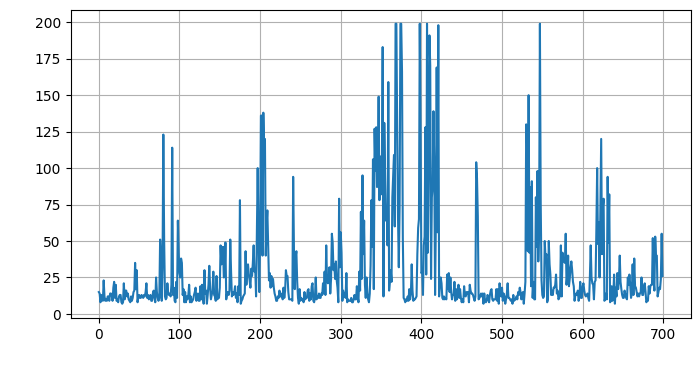

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel(" ", fontsize=14)
plt.ylabel(" ", fontsize=14)
plt.grid(True)
plt.show()